In [1]:
import json
from PIL import Image
from IPython.display import display
import os
import random
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import numpy as np

def expand2square(pil_img, background_color):
    width, height = pil_img.size
    if width == height:
        return pil_img
    elif width > height:
        result = Image.new(pil_img.mode, (width, width), background_color)
        result.paste(pil_img, (0, (width - height) // 2))
        return result
    else:
        result = Image.new(pil_img.mode, (height, height), background_color)
        result.paste(pil_img, ((height - width) // 2, 0))
        return result
    
def find_bounds(image):
    """找到图像中非白色区域的边界"""
    # 将图像转换为numpy数组
    np_image = np.array(image)
    
    # 找出所有非白色的像素点
    non_white_pixels = np.any(np_image < [250, 250, 250], axis=-1)
    rows, cols = np.where(non_white_pixels)
    
    # 获取非白色像素点的最小和最大坐标
    min_row, max_row = rows.min(), rows.max()
    min_col, max_col = cols.min(), cols.max()
    
    return min_row, max_row, min_col, max_col

def crop(image, buffer=20):
    """在确保不丢失关键信息的前提下，剪裁图像"""
    min_row, max_row, min_col, max_col = find_bounds(image)
    
    # 添加缓冲区以确保不剪掉边界附近的重要信息
    min_row = max(0, min_row - buffer)
    max_row = min(image.height, max_row + buffer)
    min_col = max(0, min_col - buffer)
    max_col = min(image.width, max_col + buffer)
    
    # 剪裁图像
    return image.crop((min_col, min_row, max_col, max_row))


In [2]:
predition_root_path = '../outputs/model_predict/geouni-512x512-0210'
gt_ori_root_path = '../data/formalgeo7k/formalgeo7k_v2/problems_withAns'
image_root_path = '../data/formalgeo7k/formalgeo7k_v2'

# 读取Formalization和Reasoning数据

In [3]:
test_reasoning_en = []
with open(os.path.join(predition_root_path, 'test_reasoning_en.jsonl'), 'r') as f:
    for line in f:
        test_reasoning_en.append(json.loads(line))
        
test_reasoning_cn = []
with open(os.path.join(predition_root_path, 'test_reasoning_cn.jsonl'), 'r') as f:
    for line in f:
        test_reasoning_cn.append(json.loads(line))
        
test_reasoning_choice_en = []
with open(os.path.join(predition_root_path, 'test_reasoning_choice_en.jsonl'), 'r') as f:
    for line in f:
        test_reasoning_choice_en.append(json.loads(line))
        
test_reasoning_choice_cn = []
with open(os.path.join(predition_root_path, 'test_reasoning_choice_cn.jsonl'), 'r') as f:
    for line in f:
        test_reasoning_choice_cn.append(json.loads(line))


test_reasoning_en_pre_formalization = []
with open(os.path.join(predition_root_path, 'test_reasoning_en_pre_formalization.jsonl'), 'r') as f:
    for line in f:
        test_reasoning_en_pre_formalization.append(json.loads(line))
        
test_reasoning_cn_pre_formalization = []
with open(os.path.join(predition_root_path, 'test_reasoning_cn_pre_formalization.jsonl'), 'r') as f:
    for line in f:
        test_reasoning_cn_pre_formalization.append(json.loads(line))
        
test_reasoning_choice_en_pre_formalization = []
with open(os.path.join(predition_root_path, 'test_reasoning_choice_en_pre_formalization.jsonl'), 'r') as f:
    for line in f:
        test_reasoning_choice_en_pre_formalization.append(json.loads(line))
        
test_reasoning_choice_cn_pre_formalization = []
with open(os.path.join(predition_root_path, 'test_reasoning_choice_cn_pre_formalization.jsonl'), 'r') as f:
    for line in f:
        test_reasoning_choice_cn_pre_formalization.append(json.loads(line))


test_mixing_en_problem = []
with open(os.path.join(predition_root_path, 'test_mixing_en_problem.jsonl'), 'r') as f:
    for line in f:
        test_mixing_en_problem.append(json.loads(line))

test_mixing_cn_problem = []
with open(os.path.join(predition_root_path, 'test_mixing_cn_problem.jsonl'), 'r') as f:
    for line in f:
        test_mixing_cn_problem.append(json.loads(line))


test_mixing_en_problem_ans = []
with open(os.path.join(predition_root_path, 'test_mixing_en_problem_ans.jsonl'), 'r') as f:
    for line in f:
        test_mixing_en_problem_ans.append(json.loads(line))

test_mixing_cn_problem_ans = []
with open(os.path.join(predition_root_path, 'test_mixing_cn_problem_ans.jsonl'), 'r') as f:
    for line in f:
        test_mixing_cn_problem_ans.append(json.loads(line))
        
        
test_mixing_en_problem_choice = []
with open(os.path.join(predition_root_path, 'test_mixing_en_problem_choice.jsonl'), 'r') as f:
    for line in f:
        test_mixing_en_problem_choice.append(json.loads(line))

test_mixing_cn_problem_choice = []
with open(os.path.join(predition_root_path, 'test_mixing_cn_problem_choice.jsonl'), 'r') as f:
    for line in f:
        test_mixing_cn_problem_choice.append(json.loads(line))


test_mixing_en_problem_ans_choice = []
with open(os.path.join(predition_root_path, 'test_mixing_en_problem_ans_choice.jsonl'), 'r') as f:
    for line in f:
        test_mixing_en_problem_ans_choice.append(json.loads(line))

test_mixing_cn_problem_ans_choice = []
with open(os.path.join(predition_root_path, 'test_mixing_cn_problem_ans_choice.jsonl'), 'r') as f:
    for line in f:
        test_mixing_cn_problem_ans_choice.append(json.loads(line))


# 可视化Reasoning

prob_id: 4637


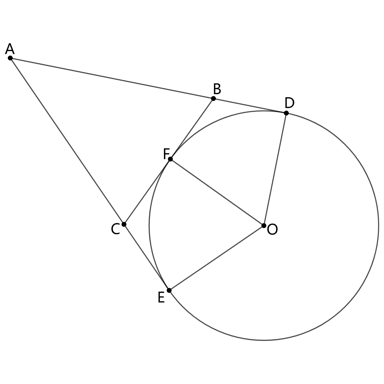

problem_text_cn: 如图所示，△ACB的周长为24，⊙O的圆心为O，⊙O的切线为AD，⊙O的切线为AE，BF是⊙O的切线，CF是⊙O的切线。求直线AD的长度。
problem_answer: 12
choices: ['24', '16', '12', '10']
GT ConsCDL: Shape(AC,CF,FB,BA), Shape(FC,CE,OFE), Shape(BF,ODF,DB), Shape(OFE,EO,OF), Shape(ODF,FO,OD), Shape(DO,OE,OED), Collinear(ACE), Collinear(ABD), Collinear(CFB), Cocircular(O,DFE)
GT ImageCDL: 
**********
Answer the question based on the provided geometry image.
Question: As shown in the diagram, the perimeter of triangle ACB is 24, O is the center of circle O, the tangent to circle O is AD, the tangent to circle O is AE, BF is the tangent to ⊙O, CF is the tangent to ⊙O. Find the length of line AD.

<think>According to the problem, the perimeter of triangle ACB is 24. AD, AE, BF, and CF are the tangents to circle O. Based on the property of tangents, the lengths from a point outside the circle to the two tangents are equal, so we can conclude that AD = AE and BF = CF.

Using the perimeter formula of the triangle, we can express AB as AB = -

In [14]:
idx = random.sample(range(len(test_reasoning_en)), 1)[0]
assert test_reasoning_en[idx]['question_id'] == test_reasoning_cn[idx]['question_id'] == test_reasoning_choice_en[idx]['question_id'] == test_reasoning_choice_cn[idx]['question_id']
prob_id = test_reasoning_en[idx]['question_id']
image = Image.open(os.path.join(image_root_path, f'diagrams/{prob_id}.png')).convert('RGB')
image = expand2square(crop(image), (255, 255, 255))

with open(os.path.join(gt_ori_root_path, f"{prob_id}.json"), 'r') as f:
    ori_info = json.load(f)
gt_consCDL = ', '.join(ori_info['construction_cdl'])
gt_imgCDL = ', '.join(ori_info['image_cdl'])
problem_text_en = ori_info['problem_text_en']
problem_text_cn = ori_info['problem_text_cn']
problem_answer = ori_info['problem_answer']
formalSSS_Solution = ori_info['formalSSS_Solution']
ori_qa = ori_info['origin_qa']
ori_q = ori_qa['Question']
ori_a = ori_qa['Solution']
Choices = ori_qa['Choices']
print(f'prob_id: {prob_id}')
display(image.resize((384, 384)))
print(f'problem_text_cn: {problem_text_cn}')
print(f'problem_answer: {problem_answer}')
print(f'choices: {Choices}')
print(f'GT ConsCDL: {gt_consCDL}\nGT ImageCDL: {gt_imgCDL}')
print("*" * 10)
print(test_reasoning_en[idx]['prompt'] + '\n')
print(test_reasoning_en[idx]['response'] + '\n')
print("*" * 10)
print(test_reasoning_cn[idx]['prompt'] + '\n')
print(test_reasoning_cn[idx]['response'] + '\n')
print("*" * 10)
print(test_reasoning_choice_en[idx]['prompt'] + '\n')
print(test_reasoning_choice_en[idx]['response'] + '\n')
print("*" * 10)
print(test_reasoning_choice_cn[idx]['prompt'] + '\n')
print(test_reasoning_choice_cn[idx]['response'] + '\n')
print("*" * 10)
print(test_reasoning_en_pre_formalization[idx]['prompt'] + '\n')
print(test_reasoning_en_pre_formalization[idx]['response'] + '\n')
print("*" * 10)
print(test_reasoning_cn_pre_formalization[idx]['prompt'] + '\n')
print(test_reasoning_cn_pre_formalization[idx]['response'] + '\n')
print("*" * 10)
print(test_reasoning_choice_en_pre_formalization[idx]['prompt'] + '\n')
print(test_reasoning_choice_en_pre_formalization[idx]['response'] + '\n')
print("*" * 10)
print(test_reasoning_choice_cn_pre_formalization[idx]['prompt'] + '\n')
print(test_reasoning_choice_cn_pre_formalization[idx]['response'] + '\n')


# 可视化t2i

In [15]:
gen_img_cdl2i_cn = Image.open(os.path.join(predition_root_path, 'gen_imgs_cdl2i_cn', f'geouni_{prob_id}.png')).convert('RGB')
gen_img_cdl2i_en = Image.open(os.path.join(predition_root_path, 'gen_imgs_cdl2i_en', f'geouni_{prob_id}.png')).convert('RGB')
gen_imgs_caption2i_cn = Image.open(os.path.join(predition_root_path, 'gen_imgs_caption2i_cn', f'geouni_{prob_id}.png')).convert('RGB')
gen_imgs_caption2i_en = Image.open(os.path.join(predition_root_path, 'gen_imgs_caption2i_en', f'geouni_{prob_id}.png')).convert('RGB')
gen_imgs_gpt_caption2i_cn = Image.open(os.path.join(predition_root_path, 'gen_imgs_gpt_caption2i_cn', f'geouni_{prob_id}.png')).convert('RGB')
gen_imgs_gpt_caption2i_en = Image.open(os.path.join(predition_root_path, 'gen_imgs_gpt_caption2i_en', f'geouni_{prob_id}.png')).convert('RGB')

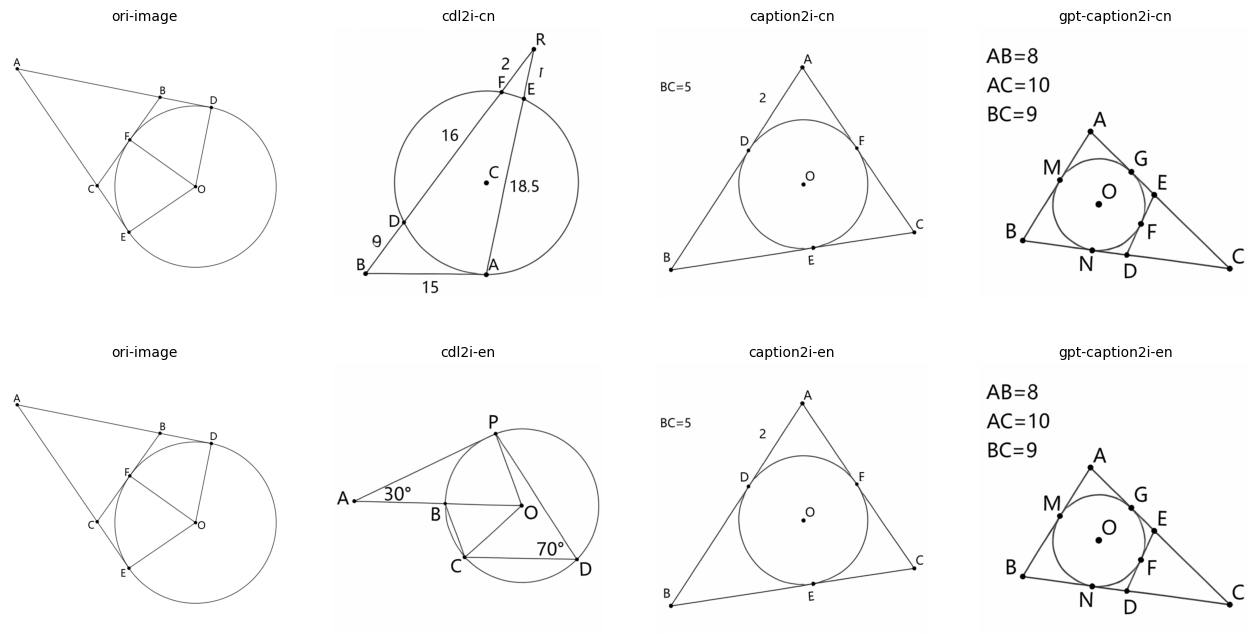

In [16]:
# 假设你已经有8张图片，存放在一个列表里
images = [image, gen_img_cdl2i_cn, gen_imgs_caption2i_cn, gen_imgs_gpt_caption2i_cn, 
          image, gen_img_cdl2i_en, gen_imgs_caption2i_en, gen_imgs_gpt_caption2i_en]
captions = ["ori-image", "cdl2i-cn", "caption2i-cn", "gpt-caption2i-cn", 
          "ori-image", "cdl2i-en", "caption2i-en", "gpt-caption2i-en", 
]

# 创建一个2x4的图像网格
fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # 设置图像大小
axes = axes.flatten()  # 将 2x4 的数组展平

# 绘制每张图像并添加caption
for i, ax in enumerate(axes):
    ax.imshow(images[i])  # 显示图像
    ax.set_title(captions[i], fontsize=10)  # 设置标题
    ax.axis('off')  # 关闭坐标轴

# 调整子图之间的间距
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

# 可视化Mixing出题

In [17]:
mixing_en_problem_img = Image.open(os.path.join(predition_root_path, "test_mixing_en_problem", f"Prob_{prob_id}_Img_0.png")).convert("RGB")
assert test_mixing_en_problem[idx]['question_id'] == prob_id
mixing_en_problem = test_mixing_en_problem[idx]['response']
mixing_en_prompt = test_mixing_en_problem[idx]['prompt']

mixing_cn_problem_img = Image.open(os.path.join(predition_root_path, "test_mixing_cn_problem", f"Prob_{prob_id}_Img_0.png")).convert("RGB")
assert test_mixing_cn_problem[idx]['question_id'] == prob_id
mixing_cn_problem = test_mixing_cn_problem[idx]['response']
mixing_cn_prompt = test_mixing_cn_problem[idx]['prompt']

mixing_en_problem_img_ans = Image.open(os.path.join(predition_root_path, "test_mixing_en_problem_ans", f"Prob_{prob_id}_Img_0.png")).convert("RGB")
assert test_mixing_en_problem_ans[idx]['question_id'] == prob_id
mixing_en_problem_ans = test_mixing_en_problem_ans[idx]['response']
mixing_en_prompt_ans = test_mixing_en_problem_ans[idx]['prompt']

mixing_cn_problem_img_ans = Image.open(os.path.join(predition_root_path, "test_mixing_cn_problem_ans", f"Prob_{prob_id}_Img_0.png")).convert("RGB")
assert test_mixing_cn_problem_ans[idx]['question_id'] == prob_id
mixing_cn_problem_ans = test_mixing_cn_problem_ans[idx]['response']
mixing_cn_prompt_ans = test_mixing_cn_problem_ans[idx]['prompt']


mixing_en_problem_img_choice = Image.open(os.path.join(predition_root_path, "test_mixing_en_problem_choice", f"Prob_{prob_id}_Img_0.png")).convert("RGB")
assert test_mixing_en_problem_choice[idx]['question_id'] == prob_id
mixing_en_problem_choice = test_mixing_en_problem_choice[idx]['response']
mixing_en_prompt_choice = test_mixing_en_problem_choice[idx]['prompt']

mixing_cn_problem_img_choice = Image.open(os.path.join(predition_root_path, "test_mixing_cn_problem_choice", f"Prob_{prob_id}_Img_0.png")).convert("RGB")
assert test_mixing_cn_problem_choice[idx]['question_id'] == prob_id
mixing_cn_problem_choice = test_mixing_cn_problem_choice[idx]['response']
mixing_cn_prompt_choice = test_mixing_cn_problem_choice[idx]['prompt']

mixing_en_problem_img_ans_choice = Image.open(os.path.join(predition_root_path, "test_mixing_en_problem_ans_choice", f"Prob_{prob_id}_Img_0.png")).convert("RGB")
assert test_mixing_en_problem_ans_choice[idx]['question_id'] == prob_id
mixing_en_problem_ans = test_mixing_en_problem_ans_choice[idx]['response']
mixing_en_prompt_ans_choice = test_mixing_en_problem_ans_choice[idx]['prompt']

mixing_cn_problem_img_ans_choice = Image.open(os.path.join(predition_root_path, "test_mixing_cn_problem_ans_choice", f"Prob_{prob_id}_Img_0.png")).convert("RGB")
assert test_mixing_cn_problem_ans_choice[idx]['question_id'] == prob_id
mixing_cn_problem_ans_choice = test_mixing_cn_problem_ans_choice[idx]['response']
mixing_cn_prompt_ans_choice = test_mixing_cn_problem_ans_choice[idx]['prompt']

根据提供的知识点绘图并出题。知识点：圆的切线性质、切线与半径垂直、切线的判定定理、三角形周长公式、代数运算。


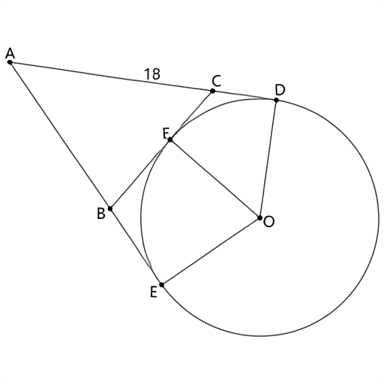

题目：如图所示，AD=18，O是⊙O的圆心，圆O的切线为AD，圆O的切线为AE，BF是圆O的切线，CF是⊙O的切线。求△ABC的周长。
##########
根据提供的知识点绘图、出题并解答。知识点：圆的切线性质、切线与半径垂直、切线的判定定理、三角形周长公式、代数运算。


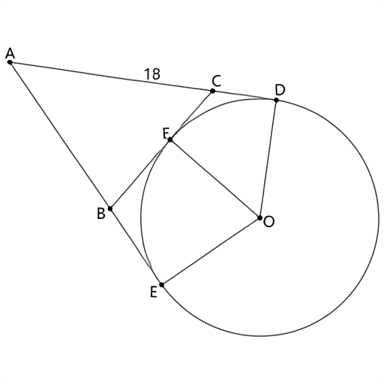

题目：如图所示，AD=18，O是⊙O的圆心，圆O的切线为AD，圆O的切线为AE，BF是圆O的切线，CF是⊙O的切线。求△ABC的周长。
解答：<think>根据题意，BF、AE、CF和AD都是圆O的切线，其中AD的长度为18。根据圆的切线性质，AD等于AE，因此AE的长度也是18。并且，OE垂直于AE，这意味着BE也是圆O的切线。再根据圆的切线性质，BE等于BF。

此外，OD垂直于AD，这意味着CD也是圆O的切线。因此，CD等于CF。我们可以得出以下结论：AB等于AE减去BE，AC等于AD减去CD，BC等于BF加上CF。

最后，利用三角形周长公式，得出AB、AC和BC的关系，从而计算得出三角形ABC的周长为36。</think><answer>由题意得，BF是圆O的切线（1），AE是圆O的切线（2），CF是圆O的切线（3），AD是圆O的切线（4），O是圆O的圆心（5），AD=18（6）；
已知条件（4）（2），由圆的切线性质（圆外一点到圆的两条切线长度相等）可得，AD=AE（7）；
已知条件（7）（6），计算可得，AE=18（8）；
已知条件（2）（5），由圆的切线性质（垂直于半径）可得，OE垂直于AE（9）；
已知条件（9）（5），由圆的切线的判定定理（垂直于半径）可得，BE是圆O的切线（10）；
已知条件（1）（10），由圆的切线性质（圆外一点到圆的两条切线长度相等）可得，BE=BF（11）；
已知条件（5）（4），由圆的切线性质（垂直于半径）可得，OD垂直于AD（12）；
已知条件（12）（5），由圆的切线的判定定理（垂直于半径）可得，CD是圆O的切线（13）；
已知条件（3）（13），由圆的切线性质（圆外一点到圆的两条切线长度相等）可得，CD=CF（14）；
由常识可得，AB=AE-BE（15）；
由常识可得，AC=AD-CD（16）；
由常识可得，BC=BF+CF（17）；
由三角形周长公式可得，AB=-AC-BC+Perimeter(△ABC)（18）；
已知条件（8）（11）（14）（15）（16）（17）（18）（6），计算可得，Perimeter(△ABC)=36（19）；
完成解题。

最终这个题的答案是：\boxed{36}</answer>
##########
根据提供的知识点绘图、出题（选择题）。知识点：圆的切线性质、切线与半径垂直、

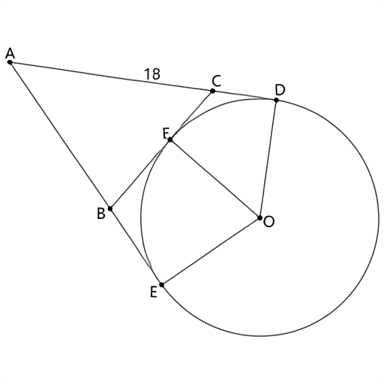

题目：如图所示，AD=18，O是⊙O的圆心，圆O的切线为AD，圆O的切线为AE，BF是圆O的切线，CF是⊙O的切线。求△ABC的周长。
A: 18
B: 27
C: 36
D: 54
##########
根据提供的知识点绘图、出题（选择题）并解答。知识点：圆的切线性质、切线与半径垂直、切线的判定定理、三角形周长公式、代数运算。


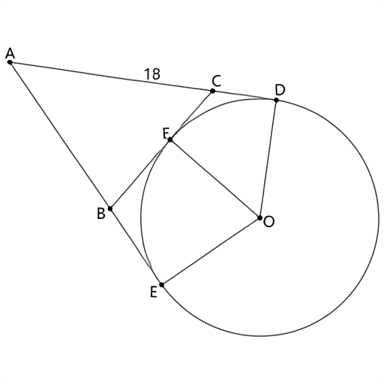

题目：如图所示，AD=18，O是⊙O的圆心，圆O的切线为AD，圆O的切线为AE，BF是圆O的切线，CF是⊙O的切线。求△ABC的周长。
A: 18
B: 27
C: 36
D: 54
解答：<think>根据题意，BF、AE、CF和AD都是圆O的切线，其中AD的长度为18。根据圆的切线性质，AD等于AE，因此AE的长度也是18。并且，OE垂直于AE，这意味着BE也是圆O的切线。再根据圆的切线性质，BE等于BF。

此外，OD垂直于AD，这意味着CD也是圆O的切线。因此，CD等于CF。我们可以得出以下结论：AB等于AE减去BE，AC等于AD减去CD，BC等于BF加上CF。

最后，利用三角形周长公式，得出AB、AC和BC的关系，从而计算得出三角形ABC的周长为36。</think><answer>由题意得，BF是圆O的切线（1），AE是圆O的切线（2），CF是圆O的切线（3），AD是圆O的切线（4），O是圆O的圆心（5），AD=18（6）；
已知条件（4）（2），由圆的切线性质（圆外一点到圆的两条切线长度相等）可得，AD=AE（7）；
已知条件（7）（6），计算可得，AE=18（8）；
已知条件（2）（5），由圆的切线性质（垂直于半径）可得，OE垂直于AE（9）；
已知条件（9）（5），由圆的切线的判定定理（垂直于半径）可得，BE是圆O的切线（10）；
已知条件（1）（10），由圆的切线性质（圆外一点到圆的两条切线长度相等）可得，BE=BF（11）；
已知条件（5）（4），由圆的切线性质（垂直于半径）可得，OD垂直于AD（12）；
已知条件（12）（5），由圆的切线的判定定理（垂直于半径）可得，CD是圆O的切线（13）；
已知条件（3）（13），由圆的切线性质（圆外一点到圆的两条切线长度相等）可得，CD=CF（14）；
由常识可得，AB=AE-BE（15）；
由常识可得，AC=AD-CD（16）；
由常识可得，BC=BF+CF（17）；
由三角形周长公式可得，AB=-AC-BC+Perimeter(△ABC)（18）；
已知条件（8）（11）（14）（15）（16）（17）（18）（6），计算可得，Perimeter(△ABC)=36（19）；
完成解题。

最终这个题的答案是：\boxed{C}</answer>


In [18]:
print(mixing_cn_prompt)
display(mixing_cn_problem_img.resize((384, 384)))
print(mixing_cn_problem)
print('#' * 10)

print(mixing_cn_prompt_ans)
display(mixing_cn_problem_img_ans.resize((384, 384)))
print(mixing_cn_problem_ans)
print('#' * 10)

print(mixing_cn_prompt_choice)
display(mixing_cn_problem_img_choice.resize((384, 384)))
print(mixing_cn_problem_choice)
print('#' * 10)

print(mixing_cn_prompt_ans_choice)
display(mixing_cn_problem_img_ans_choice.resize((384, 384)))
print(mixing_cn_problem_ans_choice)

